# ICE evaluated homework 

#### 01/12/2019
#### Virginie Guillevin

### 1) Loading the working directory ###

In [1]:
from os import chdir 
chdir("C:/Users/Virginie/Desktop/Cours Agrocampus Ouest/3ème année/ICE/Mini Projet")

### 2) Importation of the english words dataset ###

In [2]:
file = open("english-words.txt", "r")
words  = file.readlines()  #So that lines are considered as words
file.close()

### 3) Reading the fasta file ###

In [3]:
def readFastaFile(filename) :
    """
    The parameter of the function is a file containing protein sequences in 
    fasta format. The function use this file to return a unique string with 
    all the protein sequences concatenated.
    """
    
    # Opening the file whose name is filename
    fd = open(filename,'r')
    txt = fd.read()
    fd.close()
    
    # txt contains all the text of the file
    # Fisrt, we want to seperate the proteins, the symbol that starts a new protein is '>'
    seqs = txt.split('>')[1:]
    s = ""
    
    for seq in seqs :
        lines = seq.split('\n')[1:]     
        for line in lines :
            s = s + line
    return(s)

fasta = readFastaFile("human-proteome-small.fasta")

### 4) Definition of the function that inverse a character string (it will be used in the final function) ###

In [4]:
def inverse(word): 
    
    """
    The function browses the word, letter by letter and put them in inverse 
    order.
    """

    result = ""                  
    for letter in word:
     result = letter + result   
    return(result)

# Test with an example
a = "chocolate"
inverseword = inverse(a)
print("Example :", inverseword)

Example : etalocohc


### 5) Definition of the functions that search for the english words in the proteome ###

#### We define 3 different functions, one for the research of occurences for the words constituted with only one letter ('a', 'i', ...), one for the research of the other words and a last one that compile the previous functions.
#### We do that because the research of 'a' or 'i' etc, is different from the research for the other words.
#### Indeed, the proteome is browsed in two directions and doing this for only one letter would surestimate the occurences for those words.

In [5]:
def finding_words1(letter,p):
    
    """
    The function take as parameters the english word constituted with only one letter
    and the proteome file (p).
    This function browses the proteome, one letter by one. Each time the english word
    ('a', 'i', ...) is found, we increase the counter S by one. This counter represents
    the occurences of the word in the proteome. The function returns S because this 
    will be used in the last function.
    """
    
    S = 0                   #Initialization of the counter     
    for k in range(0,len(p)):
        M = p[k]
        m = M.lower()       #We make that everything is in small letters
        if letter == m:
            S = S + 1
    return(S)


def finding_words2(i,p):
    
    """
    The parameters of the function are the english word and the proteome file.
    The function browses the file p, and if the given word is found 
    in the human proteome, the function increases the variable S of 1, 
    else, S keeps the same value. 
    We just add that p is browsed in two directions (from the beginning and the end)
    so that we don't miss occurences. The function returns S because this will 
    be used in the last function.
    """
    
    S = 0                    #Initialization of the counter
    n = len(i)
    dmin = 0
    dmax = n
    while dmax <= len(p)-1:  #We make sure that the proteome word is in the proteome
        M1 = p[dmin:dmax]    #We get words from the proteome with the same length (dmax=n)
                             #than the english word and we compare the two words
                             #We start with a word at the beginning of the proteome (dmin=0 & M1)
        M2 = p[len(p)-dmax:len(p)-dmin] #or at the end of the proteome (M3)
        M3 = inverse(M2)     #Use of the function defined previously to inverse M2
                             
        m1 = M1.lower()      #We want to be sure that everything is in small letters
        m2 = M3.lower()
        if (i==m1 and i==m2):
            S = S + 2
        if (i==m1 or i==m2):
            S = S + 1
        dmin = dmin + 1     #Incrementation to browse the proteome step by step
        dmax = dmax + 1
        
    return(S)


def finding_english_words(w,p):
    
    """
    The parameters of the function are the file containing all the english words
    and the file containing the proteome.
    This function create a list D that will contain the number of occurence of 
    the english words (w) in the human proteome (p). The function browses the file
    w and calls the functions defined previously to search the different words.
    """
    
    D = {}
    for i in w:     #We take different english words, one by one to see if they are in the proteome
        i.lower()   #We make sure that the word is in lower cases
        if i[len(i)-1] == "\n": #Because the last word in the english word file 
                                #doesn't contain "\n"
            i = i[:-1]  #In order to delet the '\n' that is at the end of the word 
        else :
            i = i
        if len(i) == 1:
            S = finding_words1(i,p)
        else:
            S = finding_words2(i,p)
        D[i]=S       #Occurence for the english word concerned, put in D
    return(D)
    
occu = finding_english_words(words,fasta)
print(occu)                

{'a': 4048, 'abandon': 0, 'ability': 0, 'able': 0, 'abortion': 0, 'about': 0, 'above': 0, 'abroad': 0, 'absence': 0, 'absolute': 0, 'absolutely': 0, 'absorb': 0, 'abuse': 0, 'academic': 0, 'accept': 0, 'access': 0, 'accident': 0, 'accompany': 0, 'accomplish': 0, 'according': 0, 'account': 0, 'accurate': 0, 'accuse': 0, 'achieve': 0, 'achievement': 0, 'acid': 0, 'acknowledge': 0, 'acquire': 0, 'across': 0, 'act': 11, 'action': 0, 'active': 0, 'activist': 0, 'activity': 0, 'actor': 0, 'actress': 0, 'actual': 0, 'actually': 0, 'ad': 385, 'adapt': 0, 'add': 85, 'addition': 0, 'additional': 0, 'address': 0, 'adequate': 0, 'adjust': 0, 'adjustment': 0, 'administration': 0, 'administrator': 0, 'admire': 0, 'admission': 0, 'admit': 0, 'adolescent': 0, 'adopt': 0, 'adult': 0, 'advance': 0, 'advanced': 0, 'advantage': 0, 'adventure': 0, 'advertising': 0, 'advice': 0, 'advise': 0, 'adviser': 0, 'advocate': 0, 'affair': 0, 'affect': 0, 'afford': 0, 'afraid': 0, 'African': 0, 'African-American': 0,

### 6) Representation of occurences of all the english words ###

In [6]:
for word in words:
    if word[len(word)-1] == "\n":
        word = word[:-1]
    else :
        word = word
    print("The word", word, "appears", occu[word], "times in the proteome")

The word a appears 4048 times in the proteome
The word abandon appears 0 times in the proteome
The word ability appears 0 times in the proteome
The word able appears 0 times in the proteome
The word abortion appears 0 times in the proteome
The word about appears 0 times in the proteome
The word above appears 0 times in the proteome
The word abroad appears 0 times in the proteome
The word absence appears 0 times in the proteome
The word absolute appears 0 times in the proteome
The word absolutely appears 0 times in the proteome
The word absorb appears 0 times in the proteome
The word abuse appears 0 times in the proteome
The word academic appears 0 times in the proteome
The word accept appears 0 times in the proteome
The word access appears 0 times in the proteome
The word accident appears 0 times in the proteome
The word accompany appears 0 times in the proteome
The word accomplish appears 0 times in the proteome
The word according appears 0 times in the proteome
The word account appea

### 7) Graphic representation of the results ###

#### Importation of the packages needed ####

In [7]:
import matplotlib.pyplot as plt
from random import randint

#### Simulation of random integers between 0 and the length of the file english_words in order to choose randomly the words from this file.
#### I chose to represent only a sample of words per graph in order to be readable.
#### With the loop for it is possible to choose how many graph we want to represent.

Choose the number of graphs you want to represent5
['find', 'sin', 'passion', 'darkness', 'religious']
[1, 13, 0, 0, 0]
The following graph represent ocurrences for a sample of english words


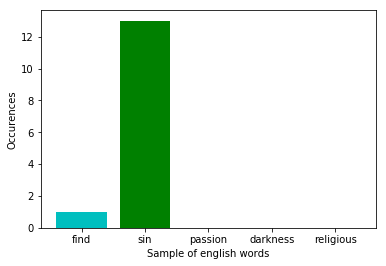

['willing', 'right', 'dangerous', 'DNA', 'expert']
[0, 0, 0, 0, 0]
The following graph represent ocurrences for a sample of english words


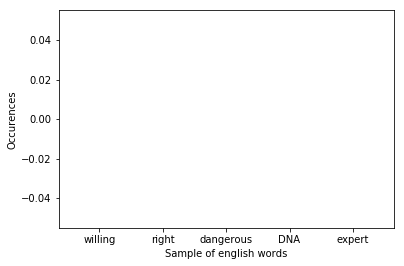

['represent', 'tip', 'scheme', 'defensive', 'cap']
[0, 11, 0, 0, 12]
The following graph represent ocurrences for a sample of english words


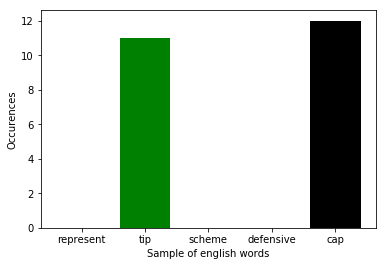

['tobacco', 'involved', 'him', 'tobacco', 'single']
[0, 0, 2, 0, 0]
The following graph represent ocurrences for a sample of english words


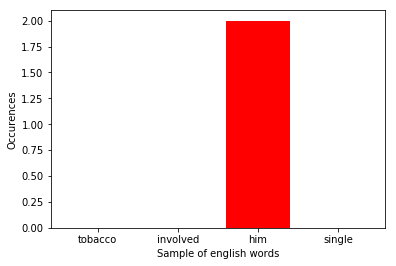

['salad', 'mad', 'implement', 'desperate', 'mainly']
[0, 8, 0, 0, 0]
The following graph represent ocurrences for a sample of english words


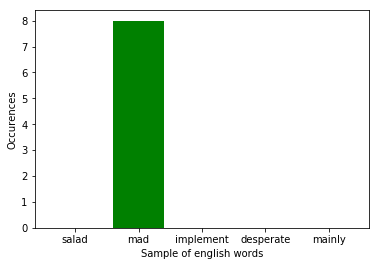

In [9]:
n = input("Choose the number of graphs you want to represent")

for k in range(0, int(n)):     #We transform n into an integer because it was a string
    
    X = []
    Y = []

    for indices_number in range(0,5):   #We choose to represent 6 words per graphs
                                        #So that the graphs are readable
                                        
        indice_word = randint(0,len(words)-1) 
        if indice_word != len(words)-1: 
            x = words[indice_word][:-1]
        else :
            x = words[indice_word]      #Because the last english word doesn't contain "\n"
                                        #So there is no need to delete it
        X.append(x)                     #List containing the words
        Y.append(occu[x])               #Liste containing the occurences
        
    print(X)                            #Enable to see which words are chosen
                                        #Example : X  = ['bunch', 'announce', 'ban', 'pan', 'into', 'Islamic']
    print(Y)                            #Enable to see what are the occurences of the chosen words
                                        #Example(correponding with the previous X list) :
                                        #Y = [0, 0, 0, 16, 0, 0]
                                        
    # Histogram to represent the occurences of the sample of the words chosen randomly
    print("The following graph represent ocurrences for a sample of english words")
    plt.bar(X,Y, color = ['c', 'g', 'r', 'y', 'k', 'm'])
    plt.xlabel("Sample of english words")
    plt.ylabel("Occurences")
    plt.show()